In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the range of the number of rolls
num_rolls_range = range(2, 51)

# Define the list of the numbers of repetitions
num_repetitions_list = [100, 500, 1000, 5000, 10000, 50000, 100000]

# Create a directory to save the generated histograms
output_dir = 'die_roll_histograms'
os.makedirs(output_dir, exist_ok=True)

In [ ]:
for num_rolls in num_rolls_range:
    for num_repetitions in num_repetitions_list:
        # Simulate the die rolls
        die_rolls = np.random.randint(1, 7, size=(num_repetitions, num_rolls))

        # sum of the die rolls
        sums = np.sum(die_rolls, axis=1)

        # mean and variance of the sums
        mean_sum = np.mean(sums)
        variance_sum = np.var(sums)


        print(f"Number of rolls: {num_rolls}, Number of repetitions: {num_repetitions}")
        print(f"Mean of sums: {mean_sum:.4f}")
        print(f"Variance of sums: {variance_sum:.4f}")
        print("-" * 30)


        plt.figure(figsize=(10, 6))
        plt.hist(sums, bins='auto', edgecolor='black')
        plt.title(f'Histogram of Sums for {num_rolls} Rolls and {num_repetitions} Repetitions')
        plt.xlabel('Sum of Die Rolls')
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)


        filename = f'rolls_{num_rolls}_repetitions_{num_repetitions}.png'
        filepath = os.path.join(output_dir, filename)
        plt.savefig(filepath)

        # Close the plot
        plt.close()

Number of rolls: 2, Number of repetitions: 100
Mean of sums: 7.1200
Variance of sums: 5.2656
------------------------------
Number of rolls: 2, Number of repetitions: 500
Mean of sums: 6.9660
Variance of sums: 6.1648
------------------------------
Number of rolls: 2, Number of repetitions: 1000
Mean of sums: 7.0950
Variance of sums: 5.9980
------------------------------
Number of rolls: 2, Number of repetitions: 5000
Mean of sums: 6.9886
Variance of sums: 5.8129
------------------------------
Number of rolls: 2, Number of repetitions: 10000
Mean of sums: 6.9569
Variance of sums: 5.8912
------------------------------
Number of rolls: 2, Number of repetitions: 50000
Mean of sums: 7.0009
Variance of sums: 5.8735
------------------------------
Number of rolls: 2, Number of repetitions: 100000
Mean of sums: 6.9986
Variance of sums: 5.8119
------------------------------
Number of rolls: 3, Number of repetitions: 100
Mean of sums: 10.7400
Variance of sums: 8.3324
-----------------------------

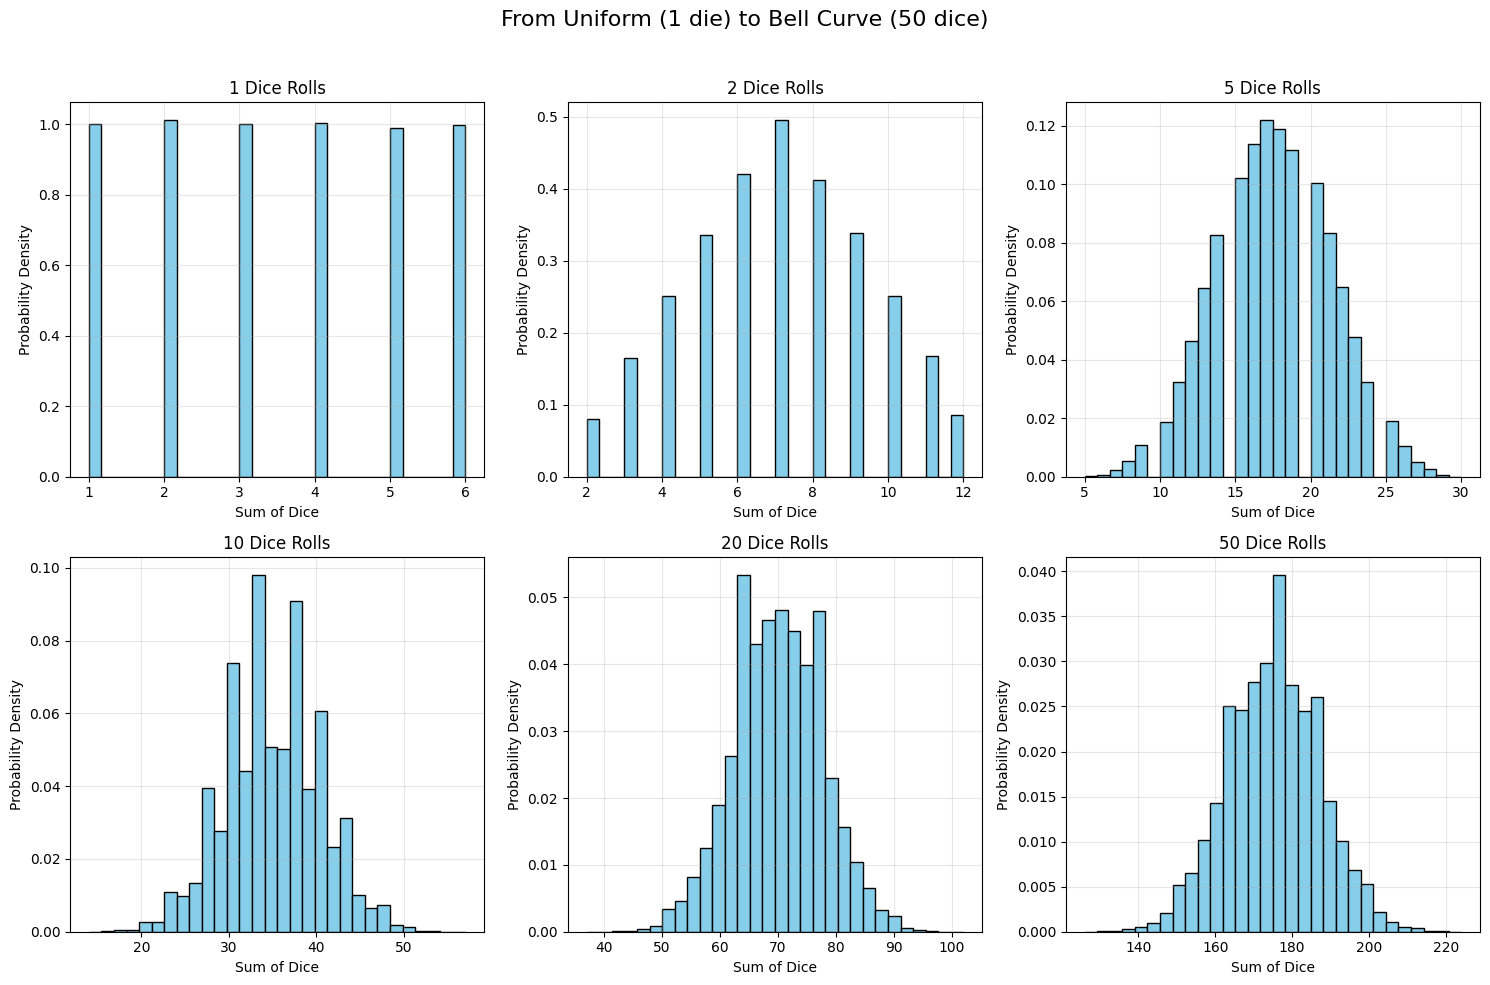

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of dice we want to visualize
num_rolls_list = [1, 2, 5, 10, 20, 50]
num_repetitions = 100000  # number of experiments for smooth histogram

plt.figure(figsize=(15, 10))

for i, num_rolls in enumerate(num_rolls_list, 1):
    # Simulate rolling dice
    rolls = np.random.randint(1, 7, size=(num_repetitions, num_rolls))
    sums = np.sum(rolls, axis=1)

    # Plot histogram
    plt.subplot(2, 3, i)
    plt.hist(sums, bins=30, density=True, color="skyblue", edgecolor="black")
    plt.title(f"{num_rolls} Dice Rolls")
    plt.xlabel("Sum of Dice")
    plt.ylabel("Probability Density")
    plt.grid(alpha=0.3)

plt.suptitle("From Uniform (1 die) to Bell Curve (50 dice)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


1 Die Roll: The first graph shows a uniform distribution.
2 to 50 Die Rolls: As we increase the number of dice rolled and sum their values, the shape of the histogram begins to change. The distribution gradually shifts from the flat, uniform shape to a more bell-shaped, symmetrical curve.

*   That's an excellent interpretation of the provided image! The graphs visually demonstrate the Central Limit Theorem (CLT).

Central Limit Theorem
The Central Limit Theorem is a fundamental concept in probability and statistics. It states that the distribution of the sum (or average) of a large number of independent and identically distributed random variables will be approximately a normal distribution, regardless of the original distribution.




In [ ]:
from scipy.stats import binom


n = 100 #total number of trials (n)
# the observed number of successes (k)
k = 97


p_values = np.linspace(0, 1, 101) # Using 101 points for a step of 0.01

# Calculate the PMF for each probability in the defined range
pmf_values = [binom.pmf(k, n, p) for p in p_values]

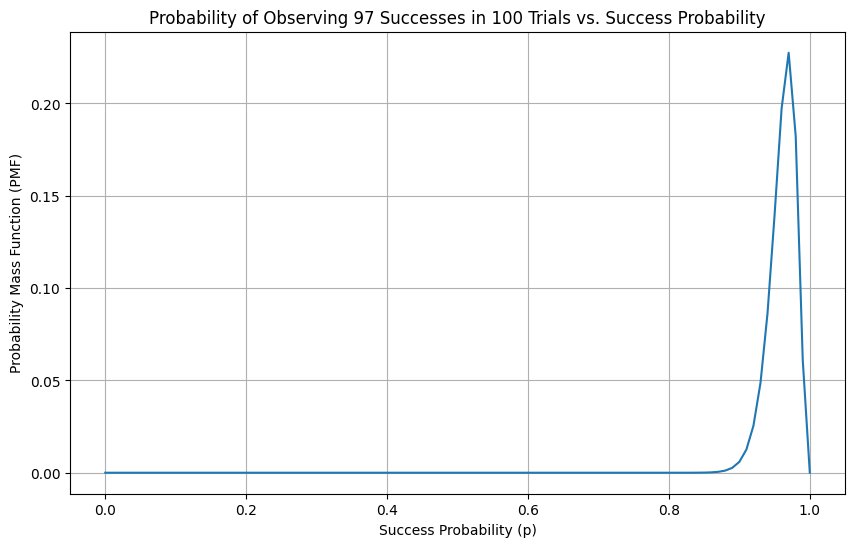

Estimated success rate for the product: 0.97


In [ ]:
# Plot the calculated PMF values against the corresponding success probabilities
plt.figure(figsize=(10, 6))
plt.plot(p_values, pmf_values)
plt.title('Probability of Observing 97 Successes in 100 Trials vs. Success Probability')
plt.xlabel('Success Probability (p)')
plt.ylabel('Probability Mass Function (PMF)')
plt.grid(True)
plt.show()

# Identify the success probability that maximizes the PMF
estimated_p = p_values[np.argmax(pmf_values)]
print(f"Estimated success rate for the product: {estimated_p:.2f}")

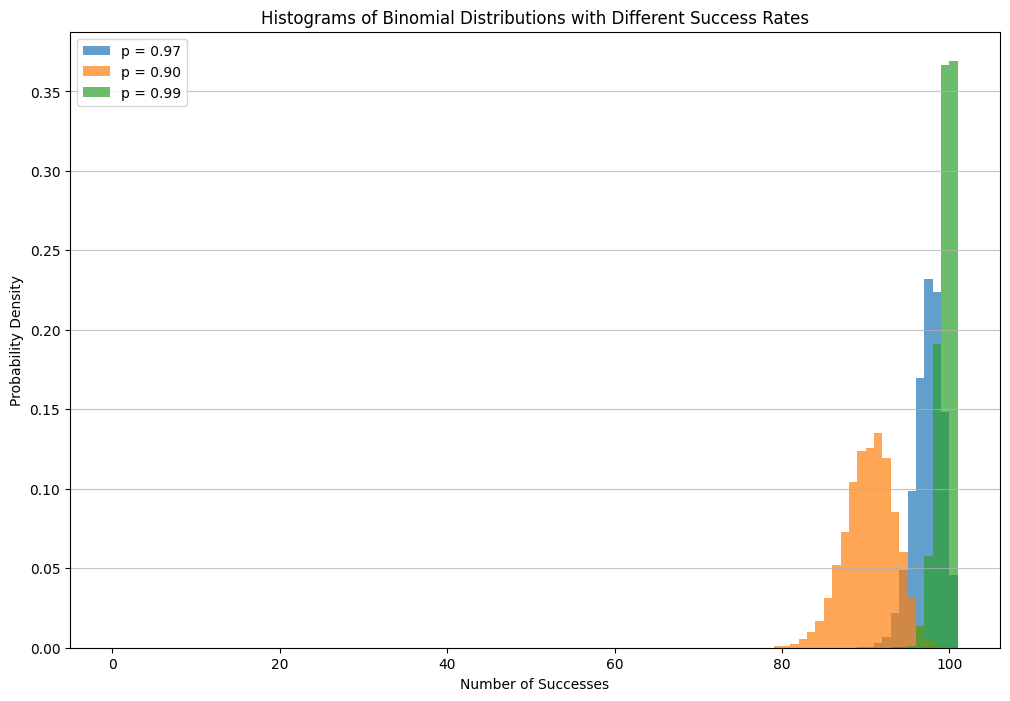

In [ ]:
# Create and plot histograms for binomial distributions with different success rates
plt.figure(figsize=(12, 8))

# Binomial distribution with the estimated success rate
estimated_binom_dist = binom.rvs(n, estimated_p, size=10000)
plt.hist(estimated_binom_dist, bins=range(0, n + 2), alpha=0.7, label=f'p = {estimated_p:.2f}', density=True)

# Binomial distribution with a lower success rate
lower_p = 0.90
lower_binom_dist = binom.rvs(n, lower_p, size=10000)
plt.hist(lower_binom_dist, bins=range(0, n + 2), alpha=0.7, label=f'p = {lower_p:.2f}', density=True)

# Binomial distribution with a higher success rate
higher_p = 0.99
higher_binom_dist = binom.rvs(n, higher_p, size=10000)
plt.hist(higher_binom_dist, bins=range(0, n + 2), alpha=0.7, label=f'p = {higher_p:.2f}', density=True)

plt.title('Histograms of Binomial Distributions with Different Success Rates')
plt.xlabel('Number of Successes')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import entropy
import numpy as np

In [ ]:
def calculate_entropy(data_series, bins=10):
    """
    Calculates the entropy of a data series.

    Args:
        data_series (pd.Series): The input data series.
        bins (int): The number of bins to use for continuous data.

    Returns:
        float: The calculated entropy.
    """
    if pd.api.types.is_numeric_dtype(data_series):
        # Handle continuous data by binning
        hist, bin_edges = np.histogram(data_series, bins=bins)
        # Calculate probabilities from histogram counts
        probabilities = hist / hist.sum()
        # Filter out zero probabilities to avoid issues with log2(0)
        probabilities = probabilities[probabilities > 0]
        return entropy(probabilities, base=2)
    else:
        # Handle categorical data
        value_counts = data_series.value_counts(normalize=True)
        return entropy(value_counts, base=2)

In [ ]:
# Regenerate representative die roll simulation data for entropy calculation
# Using one scenario for demonstration: 50 rolls, 100000 repetitions
num_rolls_sample = 50
num_repetitions_sample = 100000
die_rolls_sample = np.random.randint(1, 7, size=(num_repetitions_sample, num_rolls_sample))
sums_sample = np.sum(die_rolls_sample, axis=1)
die_roll_df = pd.DataFrame({'sum_of_rolls': sums_sample})

# Calculate and display entropy for the die roll simulation data
entropy_die_rolls = calculate_entropy(die_roll_df['sum_of_rolls'])
print(f"Entropy of the sum of die rolls ({num_rolls_sample} rolls, {num_repetitions_sample} repetitions): {entropy_die_rolls:.4f}")

# Access the binomial distribution data from previous steps
# estimated_binom_dist, lower_binom_dist, higher_binom_dist are available in the kernel

# Calculate and display entropy for each binomial distribution
entropy_estimated_binom = calculate_entropy(pd.Series(estimated_binom_dist))
print(f"Entropy of the estimated binomial distribution (p={estimated_p:.2f}): {entropy_estimated_binom:.4f}")

entropy_lower_binom = calculate_entropy(pd.Series(lower_binom_dist))
print(f"Entropy of the lower binomial distribution (p={lower_p:.2f}): {entropy_lower_binom:.4f}")

entropy_higher_binom = calculate_entropy(pd.Series(higher_binom_dist))
print(f"Entropy of the higher binomial distribution (p={higher_p:.2f}): {entropy_higher_binom:.4f}")

Entropy of the sum of die rolls (50 rolls, 100000 repetitions): 2.3086
Entropy of the estimated binomial distribution (p=0.97): 2.6100
Entropy of the lower binomial distribution (p=0.90): 2.4076
Entropy of the higher binomial distribution (p=0.99): 1.8584


As the number of repetitions in the die roll simulation increased for a fixed number of rolls, the sample mean and variance of the sums converged towards their theoretical values

In [ ]:
from google.colab import files

# Upload files interactively in Colab
uploaded = files.upload()

# After upload, make sure the filenames match exactly
# Example: dataset1.csv, dataset2.csv, dataset3.csv


Saving faa_ai_prelim - faa_ai_prelim.csv to faa_ai_prelim - faa_ai_prelim.csv


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Function to compute entropy for a column
def compute_entropy(series, bins=10):
    if series.dtype == 'object' or series.dtype.name == 'category':
        # For categorical variables
        probs = series.value_counts(normalize=True)
        return entropy(probs, base=2)  # base 2 for information entropy in bits
    else:
        # For continuous variables → binning
        counts, _ = np.histogram(series.dropna(), bins=bins)
        probs = counts / counts.sum()
        probs = probs[probs > 0]  # remove zero probabilities
        return entropy(probs, base=2)

# Function to calculate entropy for all columns in a dataset
def dataset_entropy(df, bins=10):
    entropies = {}
    for col in df.columns:
        try:
            entropies[col] = compute_entropy(df[col], bins=bins)
        except Exception as e:
            entropies[col] = f"Error: {e}"
    return entropies

# Example: Load 3 datasets (replace with your file paths after uploading)
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")
df3 = pd.read_csv("dataset3.csv")

# Compute entropies
entropy1 = dataset_entropy(df1)
entropy2 = dataset_entropy(df2)
entropy3 = dataset_entropy(df3)

# Display results
print("Entropy for Dataset 1:")
print(entropy1, "\n")

print("Entropy for Dataset 2:")
print(entropy2, "\n")

print("Entropy for Dataset 3:")
print(entropy3, "\n")


Entropy for Dataset 1:
{'price': np.float64(2.5584120118580436), 'area': np.float64(2.416578210215598), 'bedrooms': np.float64(1.578376424620024), 'bathrooms': np.float64(0.9447864125469403), 'stories': np.float64(1.6013354416692478), 'mainroad': np.float64(0.5875926904926544), 'guestroom': np.float64(0.6756416842992281), 'basement': np.float64(0.9344770602437215), 'hotwaterheating': np.float64(0.2685937636658217), 'airconditioning': np.float64(0.8995281870698585), 'parking': np.float64(1.54761485785047), 'prefarea': np.float64(0.7863917038359866), 'furnishingstatus': np.float64(1.5572561266379552)} 

Entropy for Dataset 2:
{'TV': np.float64(3.298520746043566), 'Radio': np.float64(3.289580946972087), 'Newspaper': np.float64(2.752202995241281), 'Sales': np.float64(3.053043355558367)} 

Entropy for Dataset 3:
{'UPDATED': np.float64(0.22432696034508795), 'ENTRY_DATE': np.float64(2.789723011780073), 'EVENT_LCL_DATE': np.float64(3.8502465121018954), 'EVENT_LCL_TIME': np.float64(6.1972697024

/tmp/ipython-input-236996403.py:14: RuntimeWarning: invalid value encountered in divide
  probs = counts / counts.sum()
/tmp/ipython-input-236996403.py:14: RuntimeWarning: invalid value encountered in divide
  probs = counts / counts.sum()


entropy of all features of 3 datasets